# MCI and Healthy Cohorts Analysis

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib widget

### Loading data

In [5]:
folder = "./MCI analysis/data/mci_analysis"
files = os.listdir(folder)

healthy_subjects = ['mci002.json', 'mci003.json', 'mci004.json', 'mci005.json', 'mci006.json', 'mci007.json', 'mci008.json', 'mci009.json', 'mci010.json', 'mci011.json']
# No need for unhealthy as this will be checked 
columns = ['Total Time', 'Step Time', 'Swing Time', 'Gait Time', 'Total Steps', 'Cadence', 'Step Variability', 'Gait Variability', 'Median COP Speed', 'Activity per Day']
columns_of_interest =  ['Total Time', 'Activity per Day', 'Step Time', 'Swing Time', 'Gait Time', 'Total Steps', 'Cadence', 'Step Variability', 'Gait Variability', 'Median COP Speed']
columns_to_plot = ['Activity per Day', 'Gait Time', 'Total Steps', 'Cadence', 'Gait Variability', 'Median COP Speed']
# read the data from each file and add the healthy subjects together into healthy dataframe
healthy_data = pd.DataFrame()
mci_data = pd.DataFrame()
all_data = {}
for file in files:
    df = pd.read_json(os.path.join(folder, file))
    if file in healthy_subjects:
        healthy_data = pd.concat([healthy_data, df], ignore_index=True)
        
    else:
        mci_data = pd.concat([mci_data, df], ignore_index=True)
        
    all_data[file.strip(".json")] = df
    

healthy_data.columns = columns
healthy_data = healthy_data[columns_of_interest]
mci_data.columns = columns
mci_data = mci_data[columns_of_interest]

for subject in all_data:
    if subject not in healthy_subjects:
        all_data[subject].columns = columns
        all_data[subject] = all_data[subject][columns_of_interest]
        all_data[subject] = all_data[subject][all_data[subject]['Activity per Day'] > 0]


# Filter mci_data where 'Total Activity' is 0
mci_data_filtered = mci_data[mci_data['Activity per Day'] > 0]

# Filter healthy_data where 'Total Activity' is 0
healthy_data_filtered = healthy_data[healthy_data['Activity per Day'] > 0]



### Analysis

In [7]:
import pandas as pd
from scipy.stats import ttest_ind, describe

# Initialize a dictionary to store the results
results = {'Metric': [], 'Mean_Healthy': [], 'Mean_MCI': [], 'Median_Healthy': [], 'Median_MCI': [], 'Std_Healthy': [], 'Std_MCI': [], 'Range_Healthy': [], 'Range_MCI': [],
           'P-value': [], 'Significance': []}

# Loop through each metric and calculate the statistics
for column in columns_of_interest:
    # Perform the T-test
    t_stat, p_val = ttest_ind(healthy_data_filtered[column].dropna(), mci_data_filtered[column].dropna(), nan_policy='omit')
    
    # Determine the significance level
    significance_level = 0.05
    significance = "Significant" if p_val < significance_level else "Not Significant"
    
    # Calculate descriptive statistics for each group
    desc_healthy = describe(healthy_data_filtered[column].dropna())
    desc_mci = describe(mci_data_filtered[column].dropna())
    
    # Calculate the median for each group
    median_healthy = np.median(healthy_data_filtered[column].dropna())
    median_mci = np.median(mci_data_filtered[column].dropna())
    
    # Append the results to the dictionary
    results['Metric'].append(column)
    results['Mean_Healthy'].append("{:.2f}".format(desc_healthy.mean))
    results['Mean_MCI'].append("{:.2f}".format(desc_mci.mean))
    results['Median_Healthy'].append("{:.2f}".format(median_healthy))
    results['Median_MCI'].append("{:.2f}".format(median_mci))
    results['Range_Healthy'].append("({:.2f}, {:.2f})".format(desc_healthy.minmax[0], desc_healthy.minmax[1]))
    results['Range_MCI'].append("({:.2f}, {:.2f})".format(desc_mci.minmax[0], desc_mci.minmax[1]))
    results['Std_Healthy'].append("{:.2f}".format(desc_healthy.variance ** 0.5))
    results['Std_MCI'].append("{:.2f}".format(desc_mci.variance ** 0.5))
    results['P-value'].append("{:.2f}".format(p_val))
    results['Significance'].append(significance)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results, index=results['Metric']).drop('Metric', axis=1)
# Display the table
results_df


,Mean_Healthy,Mean_MCI,Median_Healthy,Median_MCI,Std_Healthy,Std_MCI,Range_Healthy,Range_MCI,P-value,Significance
Total Time,49.46,44.93,51.19,49.95,15.89,19.45,"(4.58, 127.08)","(2.76, 86.13)",0.12,Not Significant
Activity per Day,32.24,17.96,29.62,14.78,22.60,14.55,"(1.01, 114.36)","(0.90, 69.04)",0.00,Significant
Step Time,0.75,0.94,0.74,0.88,0.18,0.24,"(0.48, 1.82)","(0.61, 1.93)",0.00,Significant
Swing Time,0.74,0.77,0.68,0.78,0.63,0.14,"(0.37, 8.15)","(0.56, 1.30)",0.76,Not Significant
Gait Time,1.35,1.62,1.33,1.54,0.27,0.33,"(0.94, 3.35)","(1.24, 2.90)",0.00,Significant
Total Steps,993.58,443.91,618.33,315.00,966.18,465.45,"(8.00, 5660.00)","(32.00, 2089.00)",0.00,Significant
Cadence,89.09,74.49,88.91,76.00,17.15,15.21,"(5.90, 127.80)","(17.05, 99.11)",0.00,Significant
Step Variability,0.70,0.80,0.55,0.67,0.49,0.52,"(0.14, 4.61)","(0.37, 3.45)",0.24,Not Significant
Gait Variability,0.62,0.70,0.57,0.59,0.30,0.41,"(0.05, 1.89)","(0.26, 2.05)",0.13,Not Significant
Median COP Speed,1.37,1.16,1.33,1.10,0.54,0.42,"(0.22, 2.85)","(0.49, 2.10)",0.02,Significant


### Plots 

comparing the Normal distribution (Bell Curves) and the Density between Healthy and MCI subjects

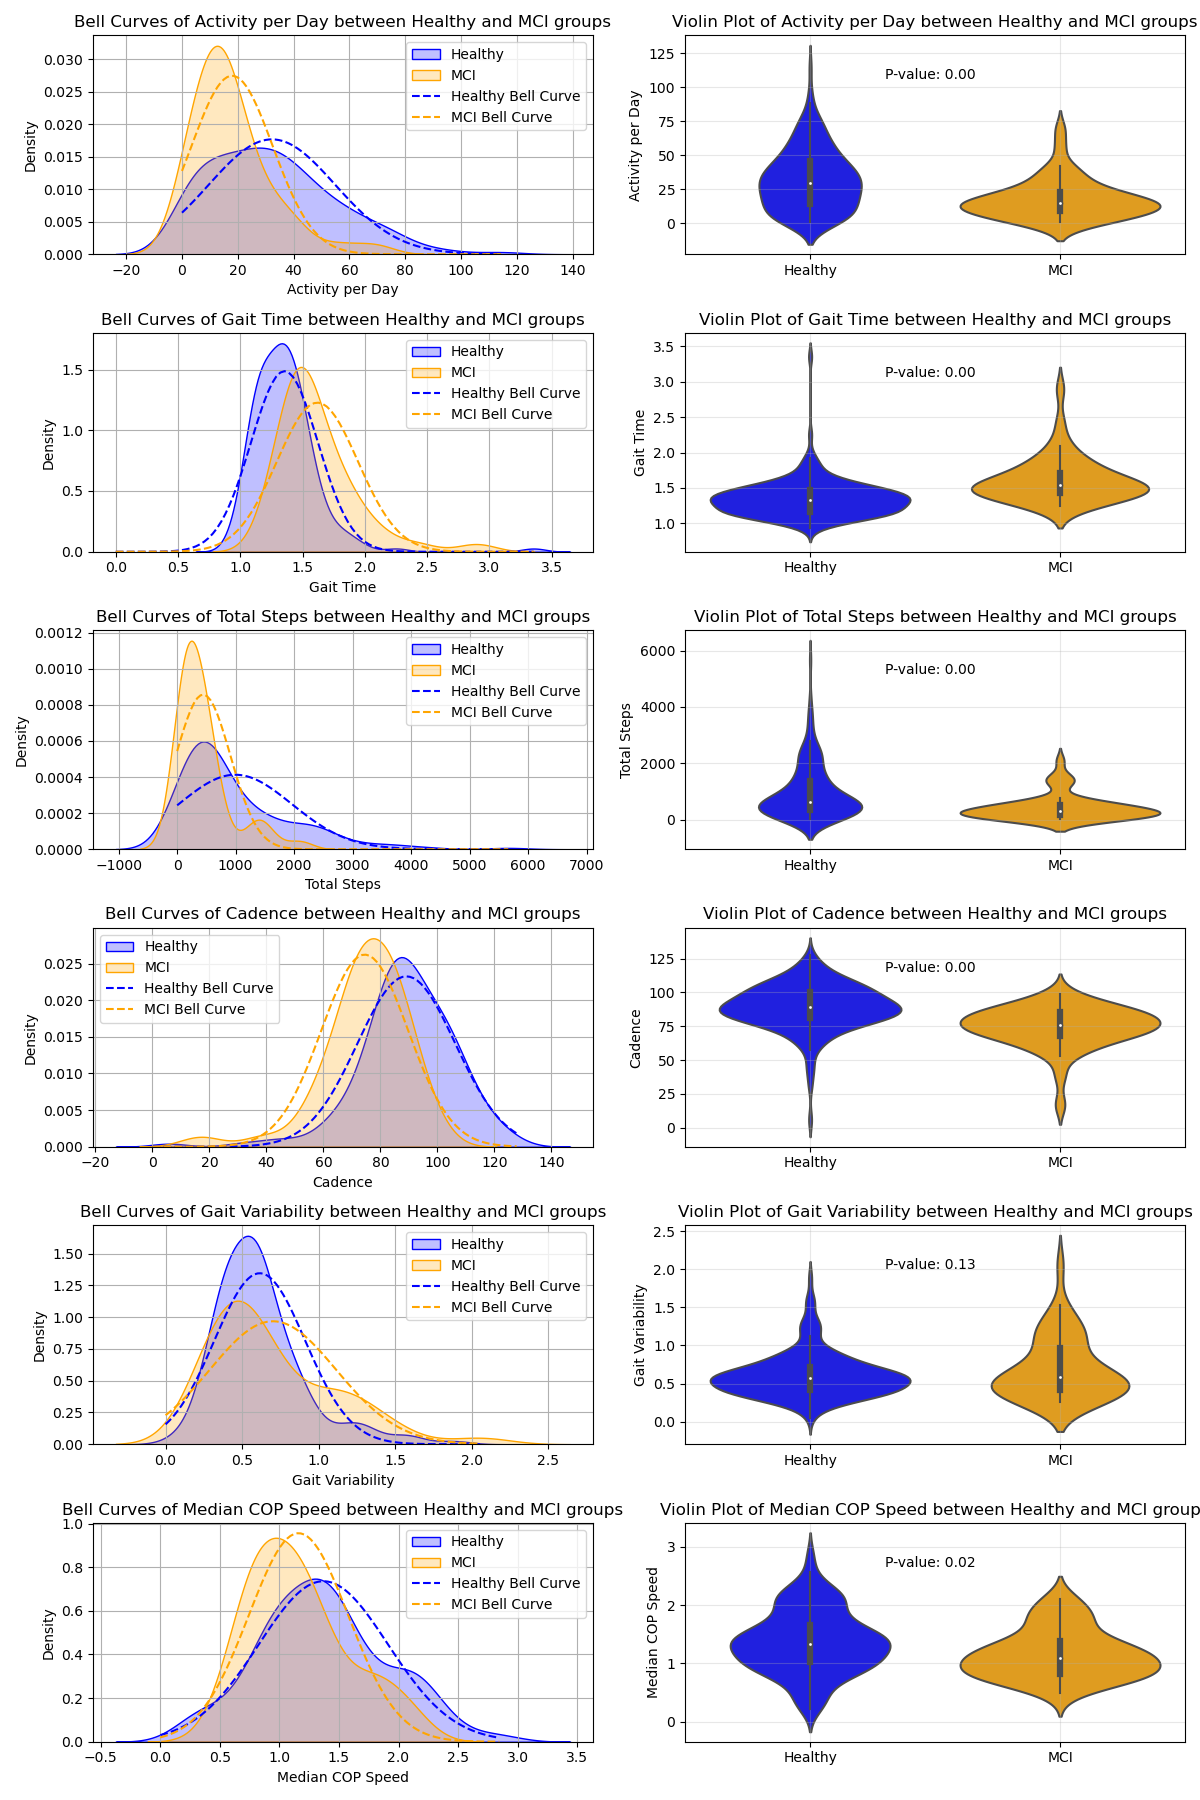

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, ttest_ind


# Create subplots for each metric
fig, axs = plt.subplots(len(columns_to_plot), 2, figsize=(12, 3 * len(columns_to_plot)))

for i, column in enumerate(columns_to_plot):
    # Select the data for the two groups
    data_healthy = healthy_data_filtered[column].dropna()
    data_mci = mci_data_filtered[column].dropna()

    # Plot the PDFs for each group in the left subplot
    sns.kdeplot(data_healthy, label='Healthy', shade=True, color='blue', ax=axs[i, 0])
    sns.kdeplot(data_mci, label='MCI', shade=True, color='orange', ax=axs[i, 0])

    # Calculate the mean and standard deviation for each group
    mean_healthy, std_healthy = data_healthy.mean(), data_healthy.std()
    mean_mci, std_mci = data_mci.mean(), data_mci.std()

    # Set the lower limit for x-axis range to exclude negative values
    x_min = 0
    x_max = max(data_healthy.max(), data_mci.max())

    # Plot bell curve for each group in the left subplot
    x = np.linspace(x_min, x_max, 100)
    axs[i, 0].plot(x, norm.pdf(x, mean_healthy, std_healthy), color='blue', linestyle='--', label='Healthy Bell Curve')
    axs[i, 0].plot(x, norm.pdf(x, mean_mci, std_mci), color='orange', linestyle='--', label='MCI Bell Curve')
    
    # # Add a vertical line at the median of the healthy group
    # median_healthy = np.median(data_healthy)  # Assuming 'data_healthy' contains your healthy group data
    # axs[i, 0].axvline(median_healthy, color='blue', linestyle='-', label='Healthy Median')

    # # Add a vertical line at the median of the MCI group
    # median_mci = np.median(data_mci)  # Assuming 'data_mci' contains your MCI group data
    # axs[i, 0].axvline(median_mci, color='orange', linestyle='-', label='MCI Median')


    # Add legend and labels to the left subplot
    axs[i, 0].legend()
    axs[i, 0].set_title(f'Bell Curves of {column} between Healthy and MCI groups')
    axs[i, 0].set_xlabel(column)
    axs[i, 0].set_ylabel('Density')

    # Perform the T-test
    t_stat, p_val = ttest_ind(data_healthy, data_mci, nan_policy='omit')

    # Add violin plot for each group in the right subplot
    sns.violinplot(data=[data_healthy, data_mci], ax=axs[i, 1], palette=['blue', 'orange'], labels=['Healthy', 'MCI'])
    axs[i, 1].set_title(f'Violin Plot of {column} between Healthy and MCI groups')
    axs[i, 1].set_xticklabels(['Healthy', 'MCI'])
    axs[i, 1].set_ylabel(column)

    axs[i, 1].text(0.4, 0.8, f"P-value: {p_val:.2f}", transform=axs[i, 1].transAxes)

    axs[i, 0].grid(visible=True, which='both', axis='both')
    axs[i, 1].grid(visible=True, which='both', alpha=0.3)

fig.tight_layout()
plt.show()


# Columns Of Interest

In [47]:
import pandas as pd
from scipy.stats import ttest_ind, describe

# Initialize a dictionary to store the results
results = {'Metric': [], 'Mean_Healthy': [], 'Mean_MCI': [], 'Median_Healthy': [], 'Median_MCI': [], 'Std_Healthy': [], 'Std_MCI': [], 'Range_Healthy': [], 'Range_MCI': [],
           'P-value': [], 'Significance': []}

columns_of_interest = ['Activity per Day', 'Gait Time', 'Cadence', 'Gait Variability', 'Median COP Speed']

healthy_data = healthy_data_filtered[columns_of_interest]
mci_data = mci_data_filtered[columns_of_interest]


# Loop through each metric and calculate the statistics
for column in healthy_data.columns:
    # Perform the T-test
    t_stat, p_val = ttest_ind(healthy_data[column].dropna(), mci_data[column].dropna(), nan_policy='omit')
    
    # Determine the significance level
    significance_level = 0.05
    significance = "Significant" if p_val < significance_level else "Not Significant"
    
    # Calculate descriptive statistics for each group
    desc_healthy = describe(healthy_data[column].dropna())
    desc_mci = describe(mci_data[column].dropna())
    
    # Calculate the median for each group
    median_healthy = np.median(healthy_data[column].dropna())
    median_mci = np.median(mci_data[column].dropna())
    
    # Append the results to the dictionary
    results['Metric'].append(column)
    results['Mean_Healthy'].append("{:.2f}".format(desc_healthy.mean))
    results['Mean_MCI'].append("{:.2f}".format(desc_mci.mean))
    results['Median_Healthy'].append("{:.2f}".format(median_healthy))
    results['Median_MCI'].append("{:.2f}".format(median_mci))
    results['Range_Healthy'].append("({:.2f}, {:.2f})".format(desc_healthy.minmax[0], desc_healthy.minmax[1]))
    results['Range_MCI'].append("({:.2f}, {:.2f})".format(desc_mci.minmax[0], desc_mci.minmax[1]))
    results['Std_Healthy'].append("{:.2f}".format(desc_healthy.variance ** 0.5))
    results['Std_MCI'].append("{:.2f}".format(desc_mci.variance ** 0.5))
    results['P-value'].append("{:.2f}".format(p_val))
    results['Significance'].append(significance)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results, index=results['Metric']).drop('Metric', axis=1)
# Display the table
results_df


,Mean_Healthy,Mean_MCI,Median_Healthy,Median_MCI,Std_Healthy,Std_MCI,Range_Healthy,Range_MCI,P-value,Significance
Activity per Day,32.24,17.96,29.62,14.78,22.60,14.55,"(1.01, 114.36)","(0.90, 69.04)",0.00,Significant
Gait Time,1.35,1.62,1.33,1.54,0.27,0.33,"(0.94, 3.35)","(1.24, 2.90)",0.00,Significant
Cadence,89.09,74.49,88.91,76.00,17.15,15.21,"(5.90, 127.80)","(17.05, 99.11)",0.00,Significant
Gait Variability,0.62,0.70,0.57,0.59,0.30,0.41,"(0.05, 1.89)","(0.26, 2.05)",0.13,Not Significant
Median COP Speed,1.37,1.16,1.33,1.10,0.54,0.42,"(0.22, 2.85)","(0.49, 2.10)",0.02,Significant


In [41]:
results_df.to_csv('./MCI analysis/results.csv')

Index(['Activity per Day', 'Gait Time', 'Cadence', 'Gait Variability',
       'Median COP Speed'],
      dtype='object')


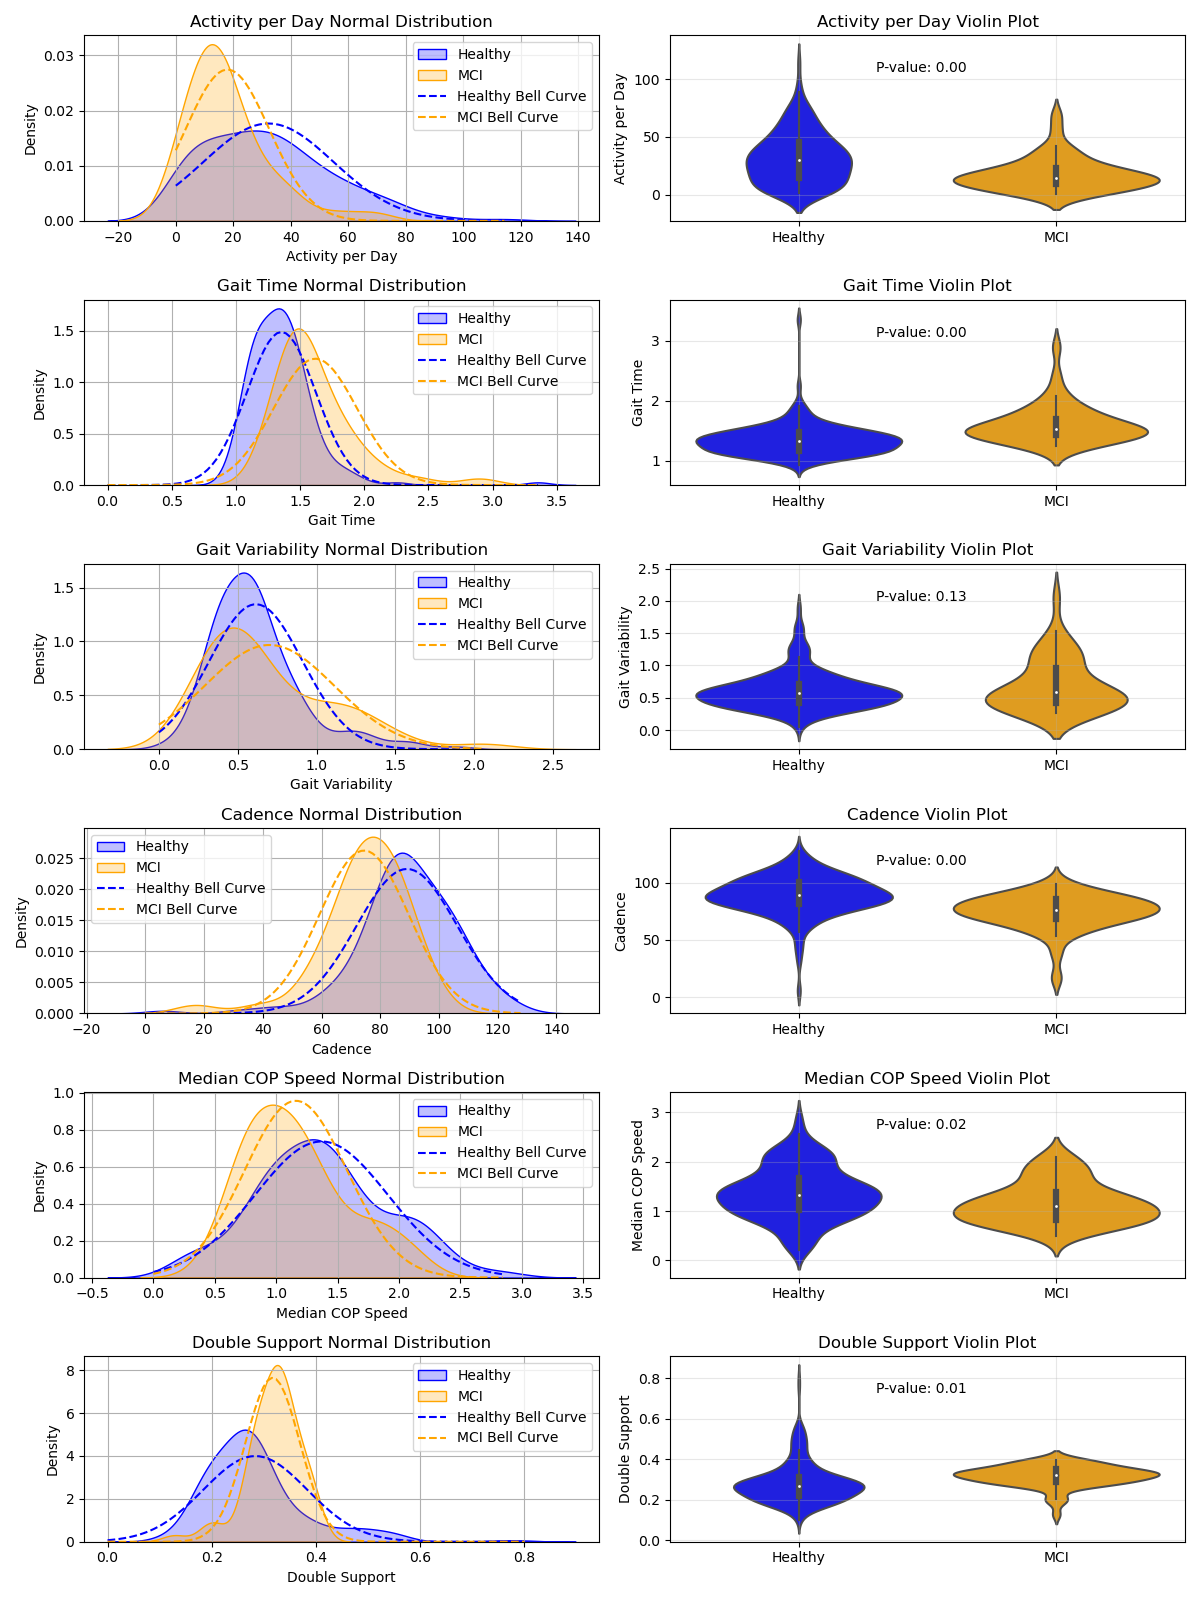

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, ttest_ind

columns_to_plot = ['Activity per Day', 'Gait Time', 'Gait Variability', 'Cadence', 'Median COP Speed']
print(healthy_data.columns)
# Create subplots for each metric
fig, axs = plt.subplots(len(columns_to_plot) + 1, 2, figsize=(12, 3 * len(columns_to_plot) + 1))

for i, column in enumerate(columns_to_plot):
    # Select the data for the two groups
    data_healthy = healthy_data[column].dropna()
    data_mci = mci_data[column].dropna()

    # Plot the PDFs for each group in the left subplot
    sns.kdeplot(data_healthy, label='Healthy', shade=True, color='blue', ax=axs[i, 0])
    sns.kdeplot(data_mci, label='MCI', shade=True, color='orange', ax=axs[i, 0])

    # Calculate the mean and standard deviation for each group
    mean_healthy, std_healthy = data_healthy.mean(), data_healthy.std()
    mean_mci, std_mci = data_mci.mean(), data_mci.std()

    # Set the lower limit for x-axis range to exclude negative values
    x_min = 0
    x_max = max(data_healthy.max(), data_mci.max())

    # Plot bell curve for each group in the left subplot
    x = np.linspace(x_min, x_max, 100)
    axs[i, 0].plot(x, norm.pdf(x, mean_healthy, std_healthy), color='blue', linestyle='--', label='Healthy Bell Curve')
    axs[i, 0].plot(x, norm.pdf(x, mean_mci, std_mci), color='orange', linestyle='--', label='MCI Bell Curve')
    
    # # Add a vertical line at the median of the healthy group
    # median_healthy = np.median(data_healthy)  # Assuming 'data_healthy' contains your healthy group data
    # axs[i, 0].axvline(median_healthy, color='blue', linestyle='-', label='Healthy Median')

    # # Add a vertical line at the median of the MCI group
    # median_mci = np.median(data_mci)  # Assuming 'data_mci' contains your MCI group data
    # axs[i, 0].axvline(median_mci, color='orange', linestyle='-', label='MCI Median')


    # Add legend and labels to the left subplot
    axs[i, 0].legend()
    axs[i, 0].set_title(f'{column} Normal Distribution')
    axs[i, 0].set_xlabel(column)
    axs[i, 0].set_ylabel('Density')

    # Perform the T-test
    t_stat, p_val = ttest_ind(data_healthy, data_mci, nan_policy='omit')

    # Add violin plot for each group in the right subplot
    sns.violinplot(data=[data_healthy, data_mci], ax=axs[i, 1], palette=['blue', 'orange'], labels=['Healthy', 'MCI'])
    axs[i, 1].set_title(f'{column} Violin Plot')
    axs[i, 1].set_xticklabels(['Healthy', 'MCI'])
    axs[i, 1].set_ylabel(column)

    axs[i, 1].text(0.4, 0.8, f"P-value: {p_val:.2f}", transform=axs[i, 1].transAxes)

    axs[i, 0].grid(visible=True, which='both', axis='both')
    axs[i, 1].grid(visible=True, which='both', alpha=0.3)


data_healthy = pd.read_csv('./MCI analysis/double_support_healthy.csv')
data_mci = pd.read_csv('./MCI analysis/double_support_mci.csv')

data_healthy = data_healthy[data_healthy['Double Support'] > 0.1]
data_mci = data_mci[data_mci['Double Support'] > 0.1]

data_healthy = data_healthy['Double Support']
data_mci = data_mci['Double Support']

sns.kdeplot(data_healthy, label='Healthy', shade=True, color='blue', ax=axs[i+1, 0])
sns.kdeplot(data_mci, label='MCI', shade=True, color='orange', ax=axs[i+1, 0])

# Calculate the mean and standard deviation for each group
mean_healthy, std_healthy = data_healthy.mean(), data_healthy.std()
mean_mci, std_mci = data_mci.mean(), data_mci.std()

# Set the lower limit for x-axis range to exclude negative values
x_min = 0
x_max = max(data_healthy.max(), data_mci.max())

# Plot bell curve for each group in the left subplot
x = np.linspace(x_min, x_max, 100)
axs[i+1, 0].plot(x, norm.pdf(x, mean_healthy, std_healthy), color='blue', linestyle='--', label='Healthy Bell Curve')
axs[i+1, 0].plot(x, norm.pdf(x, mean_mci, std_mci), color='orange', linestyle='--', label='MCI Bell Curve')


# Add legend and labels to the left subplot
axs[i+1, 0].legend()
axs[i+1, 0].set_title('Double Support Normal Distribution')
axs[i+1, 0].set_xlabel('Double Support')
axs[i+1, 0].set_ylabel('Density')

# Perform the T-test
t_stat, p_val = ttest_ind(data_healthy, data_mci, nan_policy='omit')

# Add violin plot for each group in the right subplot
sns.violinplot(data=[data_healthy, data_mci], ax=axs[i+1, 1], palette=['blue', 'orange'], labels=['Healthy', 'MCI'])
axs[i+1, 1].set_title('Double Support Violin Plot')
axs[i+1, 1].set_xticklabels(['Healthy', 'MCI'])
axs[i+1, 1].set_ylabel('Double Support')

axs[i+1, 1].text(0.4, 0.8, f"P-value: {p_val:.2f}", transform=axs[i+1, 1].transAxes)

axs[i+1, 0].grid(visible=True, which='both', axis='both')
axs[i+1, 1].grid(visible=True, which='both', alpha=0.3)




fig.tight_layout()

plt.savefig(f'./MCI analysis/plots/T-test.png')

plt.show()


In [44]:
results_df = pd.read_csv('./MCI analysis/results.csv', index_col=0)

,Mean_Healthy,Mean_MCI,Median_Healthy,Median_MCI,Std_Healthy,Std_MCI,Range_Healthy,Range_MCI,P-value,Significance
Activity per Day,32.24,17.96,29.62,14.78,22.60,14.55,"(1.01, 114.36)","(0.90, 69.04)",0.00,Significant
Gait Time,1.35,1.62,1.33,1.54,0.27,0.33,"(0.94, 3.35)","(1.24, 2.90)",0.00,Significant
Cadence,89.09,74.49,88.91,76.00,17.15,15.21,"(5.90, 127.80)","(17.05, 99.11)",0.00,Significant
Gait Variability,0.62,0.70,0.57,0.59,0.30,0.41,"(0.05, 1.89)","(0.26, 2.05)",0.13,Not Significant
Median COP Speed,1.37,1.16,1.33,1.10,0.54,0.42,"(0.22, 2.85)","(0.49, 2.10)",0.02,Significant
Double Support,0.28,0.31,0.27,0.32,0.10,0.07,"(0.09, 0.80)","(0.09, 0.40)",0.04,Significant


# Individual Analysis

In [7]:
# import os
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import pandas as pd

# # Set Seaborn style
# sns.set_theme(style="whitegrid")

# ylimits = {
#     'Total Activity': [0,100],
#     'Gait Time': [0.0, 3.0],
#     'Gait Variability': [0.0, 3],
#     'Cadence': [40, 150],
#     'Median COP Speed': [0, 3]
# }

# # Assuming the code for creating all_data dictionary is already executed

# # Create a directory for saving plots if it doesn't exist
# plots_directory = '.MCI analysis/plots/metrics_analysis/'
# if not os.path.exists(plots_directory):
#     os.makedirs(plots_directory)

# for subject in all_data.keys():
#     data = all_data[subject]
#     data = data.dropna()
#     data.index = pd.to_datetime(data.index, format='%Y-%m-%d %H:%M:%S')
    
#     # Reindex with complete date range
#     min_date = data.index.min() - pd.DateOffset(days=1) 
#     max_date = data.index.max() + pd.DateOffset(days=1)
#     complete_date_range = pd.date_range(min_date, max_date)
#     data = data.reindex(complete_date_range, fill_value=None)  # Fill missing values with zero
    
#     fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(12, 5 * len(columns_to_plot)))
    
#     # Plot each column of interest in a subplot
#     for i, column in enumerate(columns_to_plot):
#         # Calculate median and healthy range
#         mean_value = data[column].mean()
#         healthy_median = float(results_df['Median_Healthy'][column])
#         std_healthy = float(results_df['Std_Healthy'][column])
#         healthy_lower_bound = healthy_median - std_healthy
#         healthy_upper_bound = healthy_median + std_healthy

#         # Plot median and fill healthy area
#         axs[i].axhline(y=mean_value, color='blue', linestyle='--', label=f'Subject Median: {mean_value:.2f}')
#         axs[i].axhline(y=healthy_median, color='green', linestyle='--', label=f'Healthy Median: {healthy_median:.2f}')
#         axs[i].fill_between(data.index.strftime('%m-%d'), healthy_lower_bound, healthy_upper_bound, color='yellow', alpha=0.1, interpolate=True, label='Healthy Range')
        
#         sns.barplot(x=data.index, y=data[column], ax=axs[i], color='skyblue')
#         axs[i].set_title(f'{subject} - {column}')   
#         axs[i].set_ylabel(column)
#         axs[i].set_xlabel('Date')
    
#         axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees
#         axs[i].set_xticklabels(data.index.strftime('%m-%d'))  # Set formatted date labels
#         axs[i].set_ylim(ylimits[column])
#         axs[i].legend(loc='upper right')  # Show legend
        
#         print()
#     # Adjust layout to prevent overlap
#     plt.tight_layout()
    
#     # Save the plot
    
#     # plt.savefig(f'{plots_directory}/{subject}_bar_plots_filled.png')
    
#     plt.close(fig)  # Close the figure to free up memory
